# Week10 - Lab

* Use PCA to reduce dimentionality and use a linear regression to predict
* Use t-SNE to visualize

In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
print(cancer.target_names)

['malignant' 'benign']


In [2]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 455
Test examples: 114


In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## Using PCA to reduce dimensionality 

In [5]:
p = PCA(n_components=10)  
X_train_p = p.fit_transform(X_train)
X_test_p = p.transform(X_test)

## Use linear regression to predict

In [6]:
model = LinearRegression()
model.fit(X_train_p, y_train)

LinearRegression()

In [7]:
predictions = model.predict(X_test_p)

In [8]:
predictions

array([ 8.65313573e-01,  1.06486781e+00,  8.34848400e-01,  8.13883339e-01,
        2.42527162e-01,  9.56504158e-01,  7.08948782e-02,  1.25561920e+00,
        3.25027401e-01,  2.37433170e-01, -1.43124655e-02,  1.58690138e-02,
        5.64200236e-01,  6.39428492e-01, -5.32954812e-03,  1.42913515e+00,
        6.66749181e-02, -2.52914591e-01,  3.95143868e-01,  7.83315607e-01,
        4.33095841e-02,  1.35154008e+00,  8.21251440e-01,  8.68246263e-01,
        1.06517240e+00,  3.76875876e-01, -3.47293103e-01,  4.33728688e-01,
        1.01136604e+00,  1.03736742e+00,  1.34330477e+00,  1.04121128e+00,
        3.69603164e-01,  6.61293754e-01,  1.07585691e-03,  9.19174923e-01,
        8.88817060e-01,  1.16473464e+00,  1.26713536e+00, -1.22759203e-01,
        4.03065935e-01,  1.03259052e+00,  4.76621587e-01,  2.05704494e-01,
       -1.52245328e-01,  1.53243245e+00,  6.39774209e-01,  6.86112315e-01,
        3.98590906e-01,  4.52552087e-01,  5.16237618e-01,  7.90426640e-01,
        1.07080226e+00,  

In [9]:
score = mean_squared_error(y_test, predictions)
print("Mean squared error of linear regression is",score*1000)

Mean squared error of linear regression is 79.97625928021101


## Use t-sne for visualization

In [10]:
t_sne = TSNE(n_components=2, random_state=42)
X_t_sne = t_sne.fit_transform(X_test)

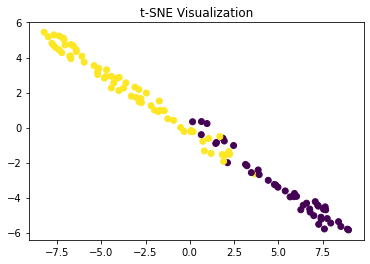

In [11]:
plt.scatter(X_t_sne[:, 0], X_t_sne[:, 1], c=y_test)
plt.title('t-SNE Visualization')
plt.show()

# Implementing the above code (PCA and t-sne) using pipelines

In [12]:
p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', LinearRegression())
             ])

params = {'pca__n_components': [5,10,15,25]}

cancer_search = GridSearchCV(p, param_grid=params, scoring='accuracy', cv=10, refit=True)
cancer_search = cancer_search.fit(X_train, y_train)

cancer_search.best_estimator_

C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true,

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=5)),
                ('model', LinearRegression())])

In [13]:
cancer_search.best_params_

{'pca__n_components': 5}

## t-sne visualization pipeline

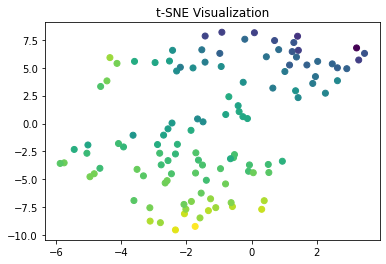

In [14]:
tsne_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('tsne', TSNE(n_components=2, random_state=42))
])

X_tsne = tsne_pipeline.fit_transform(X_test)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=predictions)
plt.title('t-SNE Visualization')
plt.show()

# Using Kernel PCA

In [15]:
from sklearn.decomposition import KernelPCA
p_kca = Pipeline([('scaling', StandardScaler()), 
              ('kpca', KernelPCA()),
              ('model', LinearRegression())
             ])

params = {'kpca__n_components': [5,10,15,25,30],
          'kpca__kernel': ['poly', 'rbf']
         }

c_search = GridSearchCV(p_kca, param_grid=params, scoring='accuracy', cv=10, refit=True)
c_search = c_search.fit(X_train, y_train)

c_search.best_estimator_

C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\CHANDRIKA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 221, in accuracy_score
    y_type, y_true,

Pipeline(steps=[('scaling', StandardScaler()),
                ('kpca', KernelPCA(kernel='poly', n_components=5)),
                ('model', LinearRegression())])

In [16]:
c_search.best_params_

{'kpca__kernel': 'poly', 'kpca__n_components': 5}

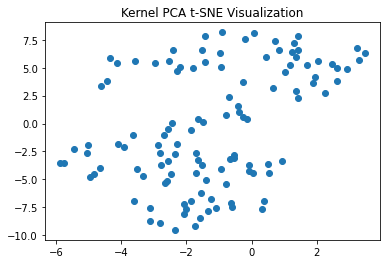

In [17]:
k_tsne_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('kpca', KernelPCA(n_components=2)),
    ('tsne', TSNE(n_components=2, random_state=42))
])

k_X_tsne = k_tsne_pipeline.fit_transform(X_test)

plt.scatter(k_X_tsne[:, 0], k_X_tsne[:, 1])
plt.title('Kernel PCA t-SNE Visualization')
plt.show()

**I have done the following in this lab:**
- Implemented normal PCA to reduce dimensionality and use a linear regression to predict and also implemented t-sne visualization.
- Implemented normal PCA to reduce dimensionality and use a linear regression to predict and also implemented t-sne visualization using pipelines.
- Implemented KernelPCA to reduce dimensionality and use a linear regression to predict and also implemented t-sne visualization using pipelines.